In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df1999=pd.read_csv("/Users/fel/code/BlueSpirit1993/hdb_resale_chat_bot/raw_data/Resale Flat Prices (Based on Approval Date), 1990 - 1999.csv")
df2012=pd.read_csv("/Users/fel/code/BlueSpirit1993/hdb_resale_chat_bot/raw_data/Resale Flat Prices (Based on Approval Date), 2000 - Feb 2012.csv")
df2014=pd.read_csv("/Users/fel/code/BlueSpirit1993/hdb_resale_chat_bot/raw_data/Resale Flat Prices (Based on Registration Date), From Mar 2012 to Dec 2014.csv")
df2016=pd.read_csv("/Users/fel/code/BlueSpirit1993/hdb_resale_chat_bot/raw_data/Resale Flat Prices (Based on Registration Date), From Jan 2015 to Dec 2016.csv")
df2025=pd.read_csv("/Users/fel/code/BlueSpirit1993/hdb_resale_chat_bot/raw_data/Resale flat prices based on registration date from Jan-2017 onwards.csv")

In [3]:
df=pd.concat([df1999,df2012,df2014,df2016,df2025],axis=0)

In [4]:
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 949511 entries, 0 to 203307
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                949511 non-null  object 
 1   town                 949511 non-null  object 
 2   flat_type            949511 non-null  object 
 3   block                949511 non-null  object 
 4   street_name          949511 non-null  object 
 5   storey_range         949511 non-null  object 
 6   floor_area_sqm       949511 non-null  float64
 7   flat_model           949511 non-null  object 
 8   lease_commence_date  949511 non-null  int64  
 9   resale_price         949511 non-null  float64
 10  remaining_lease      240461 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 86.9+ MB


In [8]:
df["month"] = pd.to_datetime(df["month"])
df = df.sort_values(by="month")

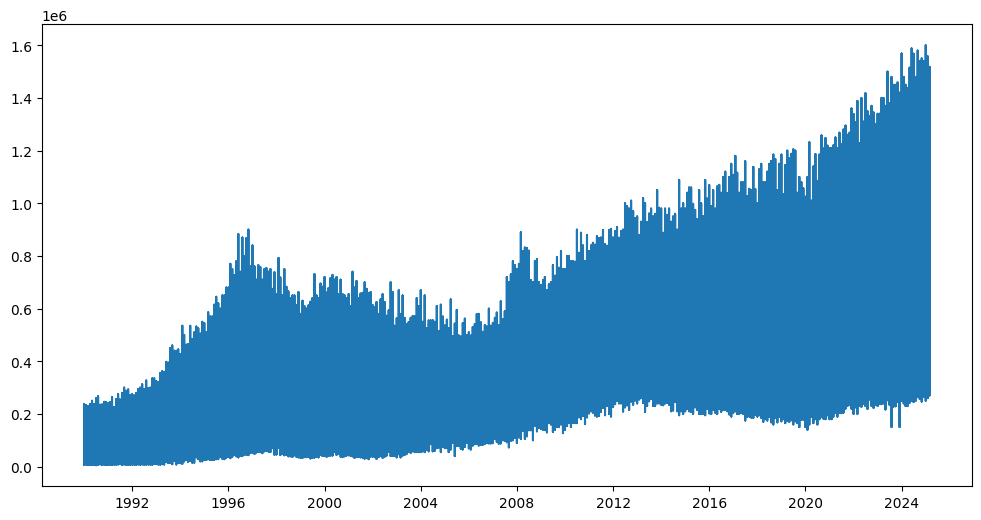

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(df["month"],df["resale_price"])

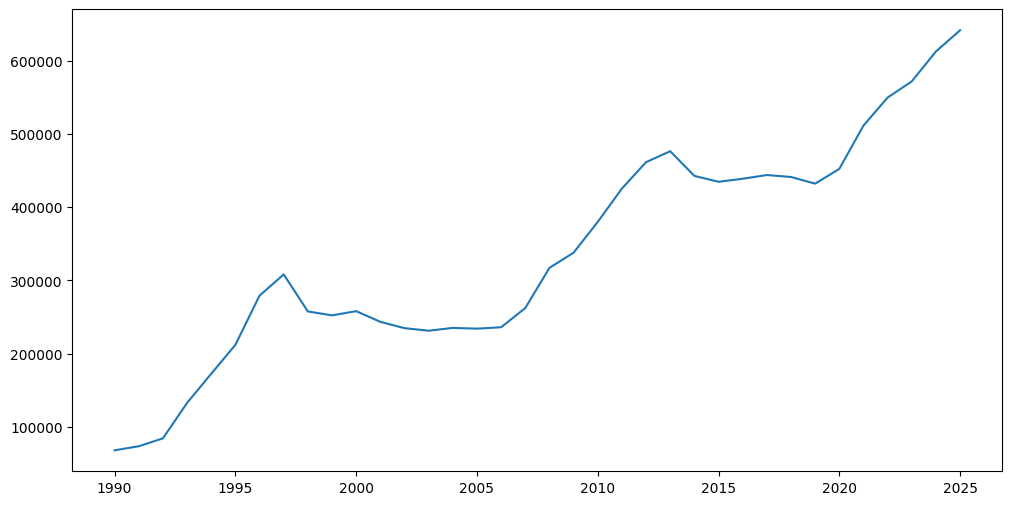

In [14]:
df["year"] = df["month"].dt.year
df_grouped = df.groupby("year")["resale_price"].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(df_grouped["year"], df_grouped["resale_price"])